In [7]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')
data_path = "/content/drive/MyDrive/Colab Notebooks/class.vision-master/images"
image = cv2.imread(f'{data_path}/akhavan.jpg')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


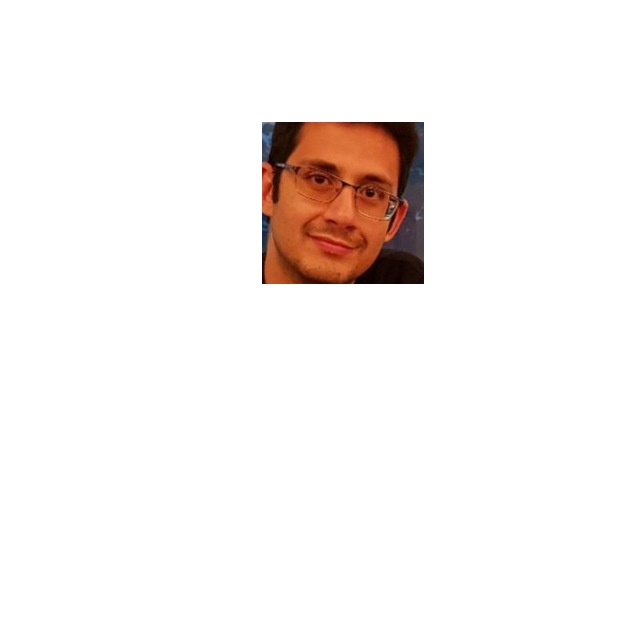

In [8]:
# Load the pre-trained Haar Cascade classifier for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Convert the image to grayscale for face detection
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces in the image
faces = face_cascade.detectMultiScale(gray, 1.1, 4)

# Add an alpha channel (make it BGRA)
image_with_alpha = cv2.cvtColor(image, cv2.COLOR_BGR2BGRA)

# Set the alpha channel to 0 (fully transparent) for all pixels
image_with_alpha[:, :, 3] = 0

# Set the alpha channel to 255 (fully opaque) for the face regions
for (x, y, w, h) in faces:
    image_with_alpha[y:y+h, x:x+w, 3] = 255  # Fully opaque for the face region

# Save the output image as PNG (which supports transparency)
cv2.imwrite("output_image.png", image_with_alpha)

# Display the resulting image using cv2_imshow() in Colab
cv2_imshow(image_with_alpha)
